In [ ]:
import os
import sys
try:
    from google.colab import drive
    drive.mount('/content/drive')

    FOLDER_NAME = 'UCLA/W24/CS_247/project/Empathy-Mental-Health'
    # FOLDER_NAME = 'Empathy-Mental-Health'

    sys.path.append('/content/drive/MyDrive/{}'.format(FOLDER_NAME))
    dir_path = sys.path[-1] + '/'

    %cd /content/drive/MyDrive/$FOLDER_NAME

    # Current working directory:
    !pwd

    # What files are there:
    !ls

except ModuleNotFoundError:
    running_in_colab = False
    print(
        "I guess you are running locally. If you get this message in Colab, check the files."
    )


Mounted at /content/drive
/content/drive/MyDrive/UCLA/W24/CS_247/project/Empathy-Mental-Health
/content/drive/MyDrive/UCLA/W24/CS_247/project/Empathy-Mental-Health
'Althoff academic license.docx'		  dataset   README.md	       src
'Althoff attribution only license.docx'   output    requirements.txt   train.sh


## Prerequisites

In [ ]:
# 1) Prerequisites

!pip install numpy pandas scipy scikit-learn torch pyyaml torchvision tqdm transformers

## Sample Model & Dataset

In [ ]:
# 2) Prepare sample dataset

!python3 src/process_data.py --input_path dataset/sample_input_ER.csv --output_path dataset/sample_input_model_ER.csv

tokenizer_config.json: 100% 25.0/25.0 [00:00<00:00, 129kB/s]
vocab.json: 100% 899k/899k [00:00<00:00, 60.3MB/s]
merges.txt: 100% 456k/456k [00:00<00:00, 63.4MB/s]
tokenizer.json: 100% 1.36M/1.36M [00:00<00:00, 45.1MB/s]
config.json: 100% 481/481 [00:00<00:00, 2.64MB/s]
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give 

In [ ]:
# 3) Training the sample model

!python3 src/train.py \
	--train_path=dataset/sample_input_model_ER.csv \
	--lr=2e-5 \
	--batch_size=32 \
	--lambda_EI=1.0 \
	--lambda_RE=0.5 \
	--save_model \
  --epochs=100 \
	--save_model_path=output/sample_ER.pth

2024-03-05 03:26:33.440074: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 03:26:33.440129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 03:26:33.442010: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 03:26:34.998855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
=====================Args====================
lr =  2e-05
lambda_EI =  1.0
lambda_RE =  0.5
dropout =  0.1
max_len =  64
batch_size =  32
epochs =  100
seed_val =  12
train_path =  dataset/sample_input_model_ER.csv
do_validation =  False
do_

## Prepare train/test/finetune Datasets

In [ ]:
# 4) Prepare TRAIN datasets for Emotional Reactions, Explorations, and Interpretations
!python3 src/process_data.py --input_path dataset/ER-reddit-train.csv --output_path dataset/ER-reddit-model-train.csv
!python3 src/process_data.py --input_path dataset/EX-reddit-train.csv --output_path dataset/EX-reddit-model-train.csv
!python3 src/process_data.py --input_path dataset/IP-reddit-train.csv --output_path dataset/IP-reddit-model-train.csv

tokenizer_config.json: 100% 25.0/25.0 [00:00<00:00, 135kB/s]
vocab.json: 100% 899k/899k [00:00<00:00, 43.2MB/s]
merges.txt: 100% 456k/456k [00:00<00:00, 1.82MB/s]
tokenizer.json: 100% 1.36M/1.36M [00:00<00:00, 1.80MB/s]
config.json: 100% 481/481 [00:00<00:00, 2.58MB/s]
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give 

In [ ]:
# 4) Prepare TEST datasets for Emotional Reactions, Explorations, and Interpretations
!python3 src/process_data.py --input_path dataset/ER-reddit-test.csv --output_path dataset/ER-reddit-model-test.csv
!python3 src/process_data.py --input_path dataset/EX-reddit-test.csv --output_path dataset/EX-reddit-model-test.csv
!python3 src/process_data.py --input_path dataset/IP-reddit-test.csv --output_path dataset/IP-reddit-model-test.csv

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
2024-03-05 19:02:26.405494: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable 

In [ ]:
# 4) Prepare FINETUNE datasets for Emotional Reactions, Explorations, and Interpretations
!python3 src/process_data.py --input_path dataset/finetune/er_custom_dataset.csv --output_path dataset/finetune/er_custom_model_dataset.csv
!python3 src/process_data.py --input_path dataset/finetune/ex_custom_dataset.csv --output_path dataset/finetune/ex_custom_model_dataset.csv
!python3 src/process_data.py --input_path dataset/finetune/ip_custom_dataset.csv --output_path dataset/finetune/ip_custom_model_dataset.csv

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
2024-03-10 07:14:32.860307: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable 

## Training ER/IP/EX

In [ ]:
# 5) Train on Emotional Reactions

!python3 src/train.py \
--train_path=dataset/ER-reddit-model-train.csv \
--lr=2e-5 \
--epochs=100 \
--batch_size=32 \
--lambda_EI=1.0 \
--lambda_RE=0.5 \
--test_path dataset/ER-reddit-model-test.csv \
--do_test \
--save_model \
--save_model_path=output/reddit_ER_large.pth

Streaming output truncated to the last 5000 lines.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arg

In [ ]:
# 5) Train on Interpretations

!python3 src/train.py \
--train_path=dataset/IP-reddit-model-train.csv \
--lr=2e-5 \
--epochs=100 \
--batch_size=32 \
--lambda_EI=1.0 \
--lambda_RE=0.5 \
--test_path dataset/IP-reddit-model-test.csv \
--do_test \
--save_model \
--save_model_path=output/reddit_IP_large.pth

Streaming output truncated to the last 5000 lines.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arg

In [ ]:
# 5) Train on Explorations

!python3 src/train.py \
--train_path=dataset/EX-reddit-model-train.csv \
--lr=2e-5 \
--epochs=100 \
--batch_size=32 \
--lambda_EI=1.0 \
--lambda_RE=0.5 \
--test_path dataset/EX-reddit-model-test.csv \
--do_test \
--save_model \
--save_model_path=output/reddit_EX.pth

Streaming output truncated to the last 5000 lines.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arg

## Finetuning ER/IP/EX

In [ ]:
# 6) Finetune on Emotional Reactions

!python3 src/finetune.py \
--train_path=dataset/finetune/er_custom_model_dataset.csv \
--lr=1e-5 \
--epochs=50 \
--batch_size=32 \
--lambda_EI=1.0 \
--lambda_RE=0.5 \
--test_path dataset/ER-reddit-model-test.csv \
--do_test \
--save_model \
--save_model_path=output/reddit_ER_large_finetune.pth \
--model_path=output/90-epoch-large-models/reddit_ER_large.pth

2024-03-12 05:29:25.532439: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 05:29:25.532505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 05:29:25.533881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 05:29:26.954872: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
=====================Args====================
lr =  1e-05
lambda_EI =  1.0
lambda_RE =  0.5
dropout =  0.1
max_len =  64
batch_size =  32
epochs =  50
seed_val =  12
train_path =  dataset/finetune/er_custom_model_dataset.csv
do_validation = 

In [ ]:
# 6) Finetune on Interpretations

!python3 src/finetune.py \
--train_path=dataset/finetune/ip_custom_model_dataset.csv \
--lr=1e-5 \
--epochs=50 \
--batch_size=32 \
--lambda_EI=1.0 \
--lambda_RE=0.5 \
--test_path dataset/IP-reddit-model-test.csv \
--do_test \
--save_model \
--save_model_path=output/reddit_IP_large_finetune.pth \
--model_path=output/90-epoch-large-models/reddit_IP_large.pth

2024-03-12 05:37:24.415792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 05:37:24.415842: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 05:37:24.417266: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 05:37:26.403027: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
=====================Args====================
lr =  1e-05
lambda_EI =  1.0
lambda_RE =  0.5
dropout =  0.1
max_len =  64
batch_size =  32
epochs =  50
seed_val =  12
train_path =  dataset/finetune/ip_custom_model_dataset.csv
do_validation = 

In [ ]:
# 6) Finetune on Explorations

!python3 src/finetune.py \
--train_path=dataset/finetune/ex_custom_model_dataset.csv \
--lr=1e-5 \
--epochs=50 \
--batch_size=32 \
--lambda_EI=1.0 \
--lambda_RE=0.5 \
--test_path dataset/EX-reddit-model-test.csv \
--do_test \
--save_model \
--save_model_path=output/reddit_EX_large_finetune.pth \
--model_path=output/90-epoch-large-models/reddit_EX_large.pth

2024-03-12 05:44:44.376486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 05:44:44.376529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 05:44:44.377943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 05:44:45.472001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
=====================Args====================
lr =  1e-05
lambda_EI =  1.0
lambda_RE =  0.5
dropout =  0.1
max_len =  64
batch_size =  32
epochs =  50
seed_val =  12
train_path =  dataset/finetune/ex_custom_model_dataset.csv
do_validation = 

## Testing ER/IP/EX

In [ ]:
# 7) Testing the model

!python3 src/test.py \
	--input_path dataset/non-rl-improvements2/enhanced_temp_0.2.csv \
	--output_path dataset/non-rl-improvements2/enhanced_temp_0.2-output.csv \
	--ER_model_path output/reddit_ER.pth \
	--IP_model_path output/reddit_IP.pth \
	--EX_model_path output/reddit_EX.pth

2024-03-11 07:09:28.636548: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 07:09:28.636597: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 07:09:28.637961: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 07:09:30.310993: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequ

## Generator Response Metrics

### Dataset Wrangling

In [ ]:
# (1) Reddit sample test data responses

import pandas as pd

# ER dataset
df = pd.read_csv('dataset/ER-reddit-test.csv')
# Count occurrences of 0, 1, and 2 for each column
sample_er_counts = df['level'].value_counts()
# Aggregate lengths of response posts
df['response_length'] = df['response_post'].str.len()
# Group by category (EX/IP/ER) and label (0/1/2), then calculate the average length
sample_er_average_lengths = df.groupby(['level']).agg({'response_length': 'mean'}).reset_index()

# IP dataset
df = pd.read_csv('dataset/IP-reddit-test.csv')
# Count occurrences of 0, 1, and 2 for each column
sample_ip_counts = df['level'].value_counts()
# Aggregate lengths of response posts
df['response_length'] = df['response_post'].str.len()
# Group by category (EX/IP/ER) and label (0/1/2), then calculate the average length
sample_ip_average_lengths = df.groupby(['level']).agg({'response_length': 'mean'}).reset_index()

# EX dataset
df = pd.read_csv('dataset/EX-reddit-test.csv')
# Count occurrences of 0, 1, and 2 for each column
sample_ex_counts = df['level'].value_counts()
# Aggregate lengths of response posts
df['response_length'] = df['response_post'].str.len()
# Group by category (EX/IP/ER) and label (0/1/2), then calculate the average length
sample_ex_average_lengths = df.groupby(['level']).agg({'response_length': 'mean'}).reset_index()

In [ ]:
# process model output metrics: counts, lengths across categories

import pandas as pd

def process_model_responses(csv_file_path):
    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    # Count occurrences of 0, 1, and 2 for each column
    er_counts = df['ER_label'].value_counts()
    ip_counts = df['IP_label'].value_counts()
    ex_counts = df['EX_label'].value_counts()

    # Aggregate lengths of response posts
    df['response_length'] = df['response_post'].str.len()

    # Group by category (EX/IP/ER) and label (0/1/2), then calculate the average length
    er_average_lengths = df.groupby(['ER_label']).agg({'response_length': 'mean'}).reset_index()
    ip_average_lengths = df.groupby(['IP_label']).agg({'response_length': 'mean'}).reset_index()
    ex_average_lengths = df.groupby(['EX_label']).agg({'response_length': 'mean'}).reset_index()

    return er_counts, ip_counts, ex_counts, er_average_lengths, ip_average_lengths, ex_average_lengths

In [ ]:
# (2) ED-soft-gate-output model responses
csv_file_path = 'dataset/generator_output/ED-soft-gate-output.csv'
(ed_soft_er_counts, ed_soft_ip_counts, ed_soft_ex_counts,
 ed_soft_er_average_lengths, ed_soft_ip_average_lengths, ed_soft_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (3) ED-hard-gate-output model responses
csv_file_path = 'dataset/generator_output/ED-hard-gate-output.csv'
(ed_hard_er_counts, ed_hard_ip_counts, ed_hard_ex_counts,
 ed_hard_er_average_lengths, ed_hard_ip_average_lengths, ed_hard_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (4) Dialo-gpt baseline model responses
csv_file_path = 'dataset/generator_output/dialo-gpt-output.csv'
(dialo_gpt_er_counts, dialo_gpt_ip_counts, dialo_gpt_ex_counts,
 dialo_gpt_er_average_lengths, dialo_gpt_ip_average_lengths, dialo_gpt_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (5) lp0_p0.9_t0.4 model responses
csv_file_path = 'dataset/non-rl-improvements/lp0_p0.9_t0.4-output.csv'
(lp0_p09_t04_er_counts, lp0_p09_t04_ip_counts, lp0_p09_t04_ex_counts,
 lp0_p09_t04_er_average_lengths, lp0_p09_t04_ip_average_lengths, lp0_p09_t04_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (6) lp1.0_p0.9_t0.4 model responses
csv_file_path = 'dataset/non-rl-improvements/lp1.0_p0.9_t0.4-output.csv'
(lp10_p09_t04_er_counts, lp10_p09_t04_ip_counts, lp10_p09_t04_ex_counts,
 lp10_p09_t04_er_average_lengths, lp10_p09_t04_ip_average_lengths, lp10_p09_t04_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (7) lp1.0_p0.9_t0.6 model responses
csv_file_path = 'dataset/non-rl-improvements/lp1.0_p0.9_t0.6-output.csv'
(lp10_p09_t06_er_counts, lp10_p09_t06_ip_counts, lp10_p09_t06_ex_counts,
 lp10_p09_t06_er_average_lengths, lp10_p09_t06_ip_average_lengths, lp10_p09_t06_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (8) new_model_unoptimal model responses
csv_file_path = 'dataset/non-rl-improvements/new_model_unoptimal-output.csv'
(new_model_unoptimal_er_counts, new_model_unoptimal_ip_counts, new_model_unoptimal_ex_counts,
 new_model_unoptimal_er_average_lengths, new_model_unoptimal_ip_average_lengths, new_model_unoptimal_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (9) enhanced_result model responses
csv_file_path = 'dataset/non-rl-improvements2/enhanced_result-output.csv'
(enhanced_result_er_counts, enhanced_result_ip_counts, enhanced_result_ex_counts,
 enhanced_result_er_average_lengths, enhanced_result_ip_average_lengths, enhanced_result_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (10) enhanced_temp_02 model responses
csv_file_path = 'dataset/non-rl-improvements2/enhanced_temp_0.2-output.csv'
(enhanced_temp_02_er_counts, enhanced_temp_02_ip_counts, enhanced_temp_02_ex_counts,
 enhanced_temp_02_er_average_lengths, enhanced_temp_02_ip_average_lengths, enhanced_temp_02_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (11) sft_gpt2 model responses
csv_file_path = 'dataset/rl-improvements/sft_gpt2_evaluator.csv'
(sft_gpt2_er_counts, sft_gpt2_ip_counts, sft_gpt2_ex_counts,
 sft_gpt2_er_average_lengths, sft_gpt2_ip_average_lengths, sft_gpt2_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (12) rlhf_length_0_300_evaluator model responses
csv_file_path = 'dataset/rl-improvements/rlhf_length_0_300_evaluator.csv'
(rlhf_length_0_300_er_counts, rlhf_length_0_300_ip_counts, rlhf_length_0_300_ex_counts,
 rlhf_length_0_300_er_average_lengths, rlhf_length_0_300_ip_average_lengths, rlhf_length_0_300_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (13) rlhf_therapist_length_0_200_evaluator model responses
csv_file_path = 'dataset/rl-improvements/rlhf_therapist_length_0_200_evaluator.csv'
(rlhf_therapist_length_0_200_er_counts, rlhf_therapist_length_0_200_ip_counts, rlhf_therapist_length_0_200_ex_counts,
 rlhf_therapist_length_0_200_er_average_lengths, rlhf_therapist_length_0_200_ip_average_lengths, rlhf_therapist_length_0_200_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# (14) rlhf_q_2_evaluator model responses
csv_file_path = 'dataset/rl-improvements/rlhf_q_2_evaluator.csv'
(rlhf_q_2_er_counts, rlhf_q_2_ip_counts, rlhf_q_2_ex_counts,
 rlhf_q_2_er_average_lengths, rlhf_q_2_ip_average_lengths, rlhf_q_2_ex_average_lengths) = process_model_responses(csv_file_path)

In [ ]:
# Helper functions for count percantages & average lengths for 0/1/2 & ER/IP/EX categories

from tabulate import tabulate
import pandas as pd

def aggregate_counts(er_counts, ip_counts, ex_counts):
    sample_counts = {
        'ER_label %': [er_counts[0], er_counts[1], er_counts[2]],
        'IP_label %': [ip_counts[0], ip_counts[1], ip_counts[2]],
        'EX_label %': [ex_counts[0], ex_counts[1], ex_counts[2]]
    }
    return sample_counts

def aggregate_lengths(er_lengths, ip_lengths, ex_lengths):
    return {
        'ER_label': [er_lengths['response_length'][0].round(2), er_lengths['response_length'][1].round(2), er_lengths['response_length'][2].round(2)],
        'IP_label': [ip_lengths['response_length'][0].round(2), ip_lengths['response_length'][1].round(2), ip_lengths['response_length'][2].round(2)],
        'EX_label': [ex_lengths['response_length'][0].round(2), ex_lengths['response_length'][1].round(2), ex_lengths['response_length'][2].round(2)],
    }

def calculate_percentages(counts):
    total_samples = sum(counts['ER_label %'])
    percentages = {key: [round(count / total_samples * 100, 2) for count in value] for key, value in counts.items()}
    return percentages

def create_dataframe(percentages):
    df = pd.DataFrame(percentages, index=['0 (None)', '1 (Weak)', '2 (Strong)'])
    return df

def print_table(df, title):
    print(title)
    print(tabulate(df, headers='keys', tablefmt='grid'))

In [ ]:
models = {
    'Real Sample Reddit': [sample_er_counts, sample_ip_counts, sample_ex_counts, sample_er_average_lengths, sample_ip_average_lengths, sample_ex_average_lengths],
    'ED-soft-gate-output-model': [ed_soft_er_counts, ed_soft_ip_counts, ed_soft_ex_counts, ed_soft_er_average_lengths, ed_soft_ip_average_lengths, ed_soft_ex_average_lengths],
    'ED-hard-gate-output-model': [ed_hard_er_counts, ed_hard_ip_counts, ed_hard_ex_counts, ed_hard_er_average_lengths, ed_hard_ip_average_lengths, ed_hard_ex_average_lengths],
    'Dialo-gpt-model': [dialo_gpt_er_counts, dialo_gpt_ip_counts, dialo_gpt_ex_counts, dialo_gpt_er_average_lengths, dialo_gpt_ip_average_lengths, dialo_gpt_ex_average_lengths],
    'lp0_p09_t04_model': [lp0_p09_t04_er_counts, lp0_p09_t04_ip_counts, lp0_p09_t04_ex_counts, lp0_p09_t04_er_average_lengths, lp0_p09_t04_er_average_lengths, lp0_p09_t04_er_average_lengths],
    'lp10_p09_t04_model': [lp10_p09_t04_er_counts, lp10_p09_t04_ip_counts, lp10_p09_t04_ex_counts, lp10_p09_t04_er_average_lengths, lp10_p09_t04_ip_average_lengths, lp10_p09_t04_ex_average_lengths],
    'lp10_p09_t06_model': [lp10_p09_t06_er_counts, lp10_p09_t06_ip_counts, lp10_p09_t06_ex_counts, lp10_p09_t06_er_average_lengths, lp10_p09_t06_ip_average_lengths, lp10_p09_t06_ex_average_lengths],
    'new_model_unoptimal': [new_model_unoptimal_er_counts, new_model_unoptimal_ip_counts, new_model_unoptimal_ex_counts, new_model_unoptimal_er_average_lengths, new_model_unoptimal_ip_average_lengths, new_model_unoptimal_ex_average_lengths],
    'enhanced_result_model': [enhanced_result_er_counts, enhanced_result_ip_counts, enhanced_result_ex_counts, enhanced_result_er_average_lengths, enhanced_result_ip_average_lengths, enhanced_result_ex_average_lengths],
    'enhanced_temp_02_model': [enhanced_temp_02_er_counts, enhanced_temp_02_ip_counts, enhanced_temp_02_ex_counts, enhanced_temp_02_er_average_lengths, enhanced_temp_02_ip_average_lengths, enhanced_temp_02_ex_average_lengths],
    'sft_gpt2_model': [sft_gpt2_er_counts, sft_gpt2_ip_counts, sft_gpt2_ex_counts, sft_gpt2_er_average_lengths, sft_gpt2_ip_average_lengths, sft_gpt2_ex_average_lengths],
    'rlhf_length_0_300_model': [rlhf_length_0_300_er_counts, rlhf_length_0_300_ip_counts, rlhf_length_0_300_ex_counts, rlhf_length_0_300_er_average_lengths, rlhf_length_0_300_ip_average_lengths, rlhf_length_0_300_ex_average_lengths],
    'rlhf_therapist_length_0_200_model': [rlhf_therapist_length_0_200_er_counts, rlhf_therapist_length_0_200_ip_counts, rlhf_therapist_length_0_200_ex_counts, rlhf_therapist_length_0_200_er_average_lengths, rlhf_therapist_length_0_200_ip_average_lengths, rlhf_therapist_length_0_200_ex_average_lengths],
    'rlhf_q_2_model': [rlhf_q_2_er_counts, rlhf_q_2_ip_counts, rlhf_q_2_ex_counts, rlhf_q_2_er_average_lengths, rlhf_q_2_ip_average_lengths, rlhf_q_2_ex_average_lengths]
}

### Count Metrics

In [ ]:
# loop for calculating percentages
for model_name, data in models.items():
  # extract data
  er_counts, ip_counts, ex_counts = data[0], data[1], data[2]

  # calculate percentages
  counts = aggregate_counts(er_counts, ip_counts, ex_counts)
  percentages = calculate_percentages(counts)
  count_df = create_dataframe(percentages)
  title = f'\n{model_name} Response Count Percentages:'
  print_table(count_df, title)


Real Sample Reddit Response Count Percentages:
+------------+--------------+--------------+--------------+
|            |   ER_label % |   IP_label % |   EX_label % |
+============+==============+==============+==============+
| 0 (None)   |        71.99 |        50.49 |        87.3  |
+------------+--------------+--------------+--------------+
| 1 (Weak)   |        24.43 |         1.63 |         2.28 |
+------------+--------------+--------------+--------------+
| 2 (Strong) |         3.58 |        47.88 |        10.42 |
+------------+--------------+--------------+--------------+

ED-soft-gate-output-model Response Count Percentages:
+------------+--------------+--------------+--------------+
|            |   ER_label % |   IP_label % |   EX_label % |
+============+==============+==============+==============+
| 0 (None)   |        23.78 |        90.55 |        32.57 |
+------------+--------------+--------------+--------------+
| 1 (Weak)   |        52.12 |         4.56 |        43.32

### Average Length Metrics

In [ ]:
# loop for calculating average lengths
for model_name, data in models.items():
  # extract data
  er_avg_len, ip_avg_len, ex_avg_len = data[3], data[4], data[5]

  # calculate percentages
  lengths = aggregate_lengths(er_avg_len, ip_avg_len, ex_avg_len)
  count_df = create_dataframe(lengths)
  title = f'\nAverage Length of {model_name} Responses:'
  print_table(count_df, title)


Average Length of Real Sample Reddit Responses:
+------------+------------+------------+------------+
|            |   ER_label |   IP_label |   EX_label |
+============+============+============+============+
| 0 (None)   |     201.23 |     206.57 |     249.16 |
+------------+------------+------------+------------+
| 1 (Weak)   |     330.09 |     573.8  |     194.14 |
+------------+------------+------------+------------+
| 2 (Strong) |     328.18 |     258.69 |     149.44 |
+------------+------------+------------+------------+

Average Length of ED-soft-gate-output-model Responses:
+------------+------------+------------+------------+
|            |   ER_label |   IP_label |   EX_label |
+============+============+============+============+
| 0 (None)   |      35.97 |      45.69 |      39.85 |
+------------+------------+------------+------------+
| 1 (Weak)   |      48.77 |      56.64 |      48.33 |
+------------+------------+------------+------------+
| 2 (Strong) |      51.07 |    

## Graph Diagrams

### Count Metrics

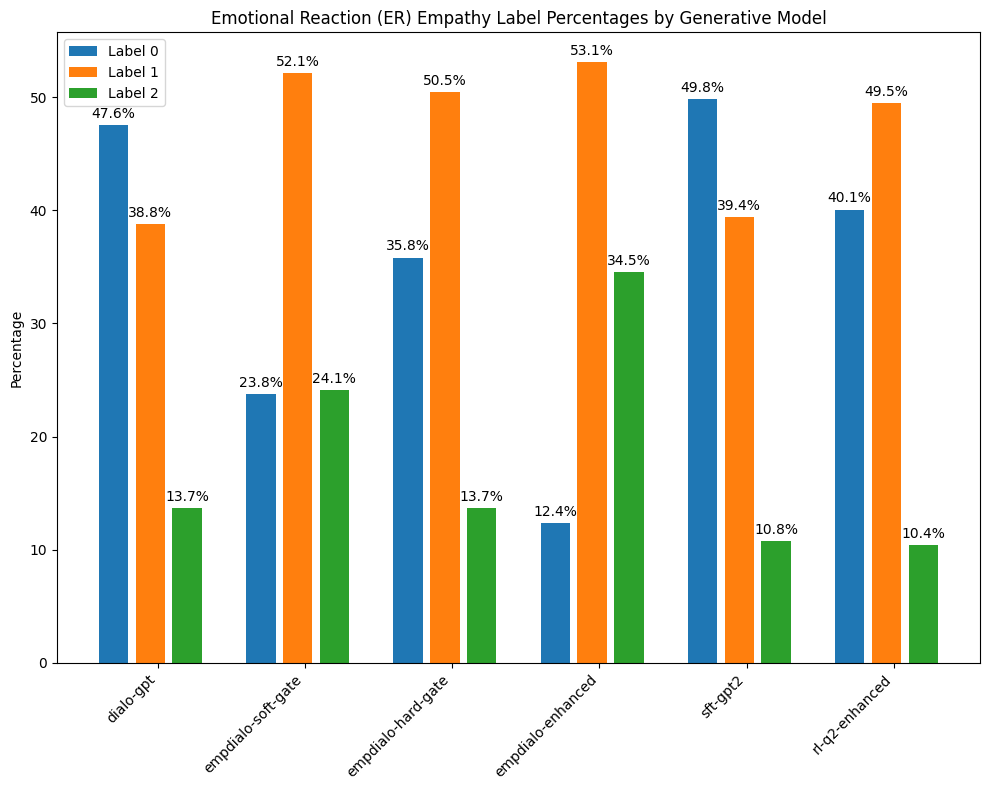

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
models = ['dialo-gpt', 'empdialo-soft-gate', 'empdialo-hard-gate', 'empdialo-enhanced', 'sft-gpt2', 'rl-q2-enhanced']
categories = ['0', '1', '2']
values = {
    'dialo-gpt': [47.56, 38.76, 13.68],
    'empdialo-soft-gate': [23.78, 52.12, 24.10],
    'empdialo-hard-gate': [35.83, 50.49, 13.68],
    'empdialo-enhanced': [12.38, 53.09, 34.53],
    'sft-gpt2': [49.84, 39.41, 10.75],
    'rl-q2-enhanced': [40.07, 49.51, 10.42]
}

# Plotting the bar chart
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.05  # space between bars

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
bars = []

for i, cat in enumerate(categories):
    bar = ax.bar(x - (1.5 * width) + i * (width + spacing), [values[model][i] for model in models], width, label=f'Label {cat}')
    bars.append(bar)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Emotional Reaction (ER) Empathy Label Percentages by Generative Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for better visibility
ax.legend()

# Label each bar with values
for bars_group in bars:
    for bar in bars_group:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


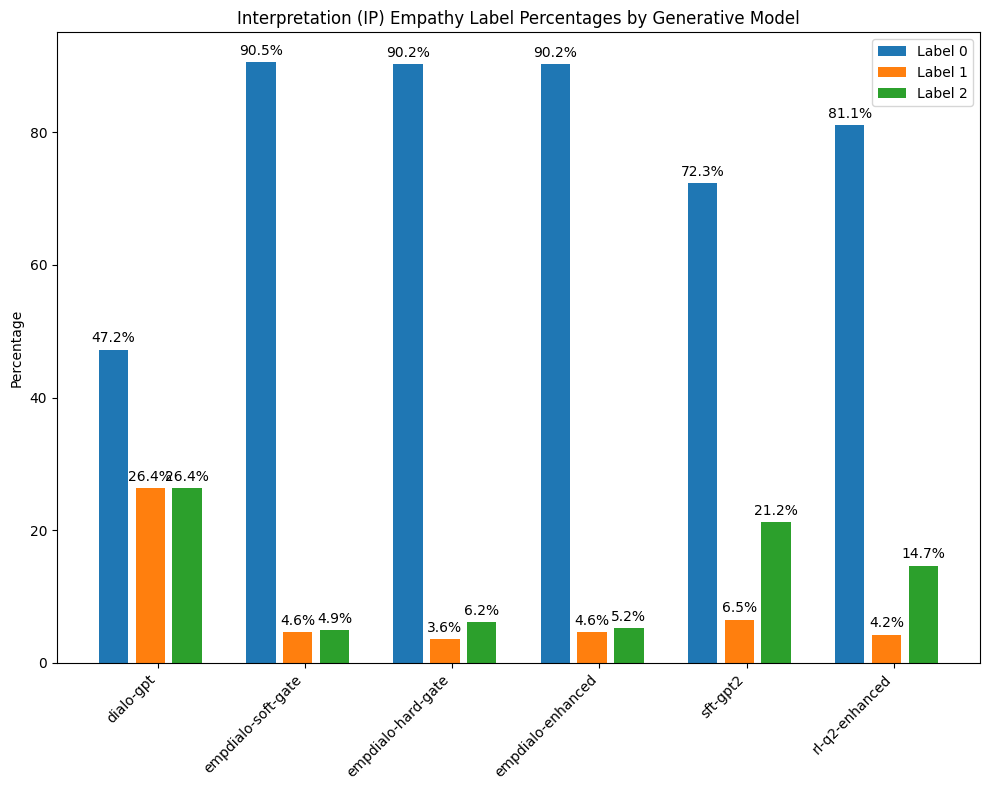

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
models = ['dialo-gpt', 'empdialo-soft-gate', 'empdialo-hard-gate', 'empdialo-enhanced', 'sft-gpt2', 'rl-q2-enhanced']
categories = ['0', '1', '2']
values = {
    'dialo-gpt': [47.23, 26.38, 26.38],
    'empdialo-soft-gate': [90.55, 4.56, 4.89],
    'empdialo-hard-gate': [90.23, 3.58, 6.19],
    'empdialo-enhanced': [90.23, 4.56, 5.21],
    'sft-gpt2': [72.31, 6.51, 21.17],
    'rl-q2-enhanced': [81.11, 4.23, 14.66]
}

# Plotting the bar chart
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.05  # space between bars

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
bars = []

for i, cat in enumerate(categories):
    bar = ax.bar(x - (1.5 * width) + i * (width + spacing), [values[model][i] for model in models], width, label=f'Label {cat}')
    bars.append(bar)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Interpretation (IP) Empathy Label Percentages by Generative Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for better visibility
ax.legend()

# Label each bar with values
for bars_group in bars:
    for bar in bars_group:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


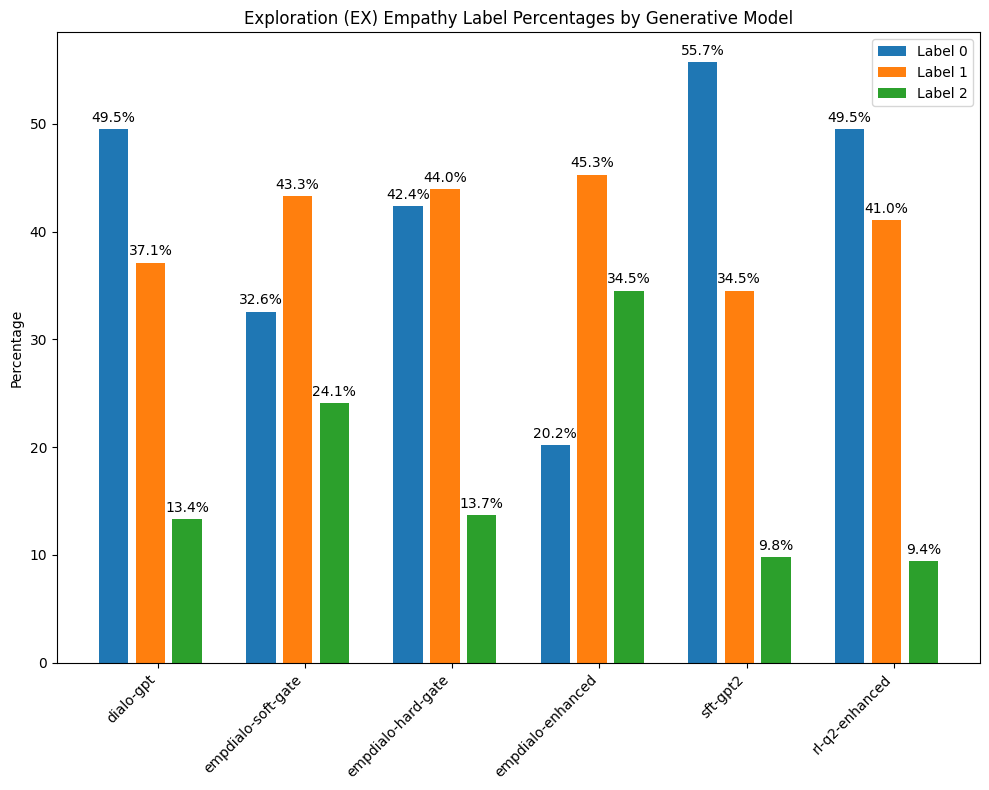

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
models = ['dialo-gpt', 'empdialo-soft-gate', 'empdialo-hard-gate', 'empdialo-enhanced', 'sft-gpt2', 'rl-q2-enhanced']
categories = ['0', '1', '2']
values = {
    'dialo-gpt': [49.51, 37.13, 13.36],
    'empdialo-soft-gate': [32.57, 43.32, 24.10],
    'empdialo-hard-gate': [42.35, 43.97, 13.68],
    'empdialo-enhanced': [20.20, 45.28, 34.53],
    'sft-gpt2': [55.70, 34.53, 9.77],
    'rl-q2-enhanced': [49.51, 41.04, 9.45]
}

# Plotting the bar chart
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.05  # space between bars

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
bars = []

for i, cat in enumerate(categories):
    bar = ax.bar(x - (1.5 * width) + i * (width + spacing), [values[model][i] for model in models], width, label=f'Label {cat}')
    bars.append(bar)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Exploration (EX) Empathy Label Percentages by Generative Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for better visibility
ax.legend()

# Label each bar with values
for bars_group in bars:
    for bar in bars_group:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


### Average Length Metrics

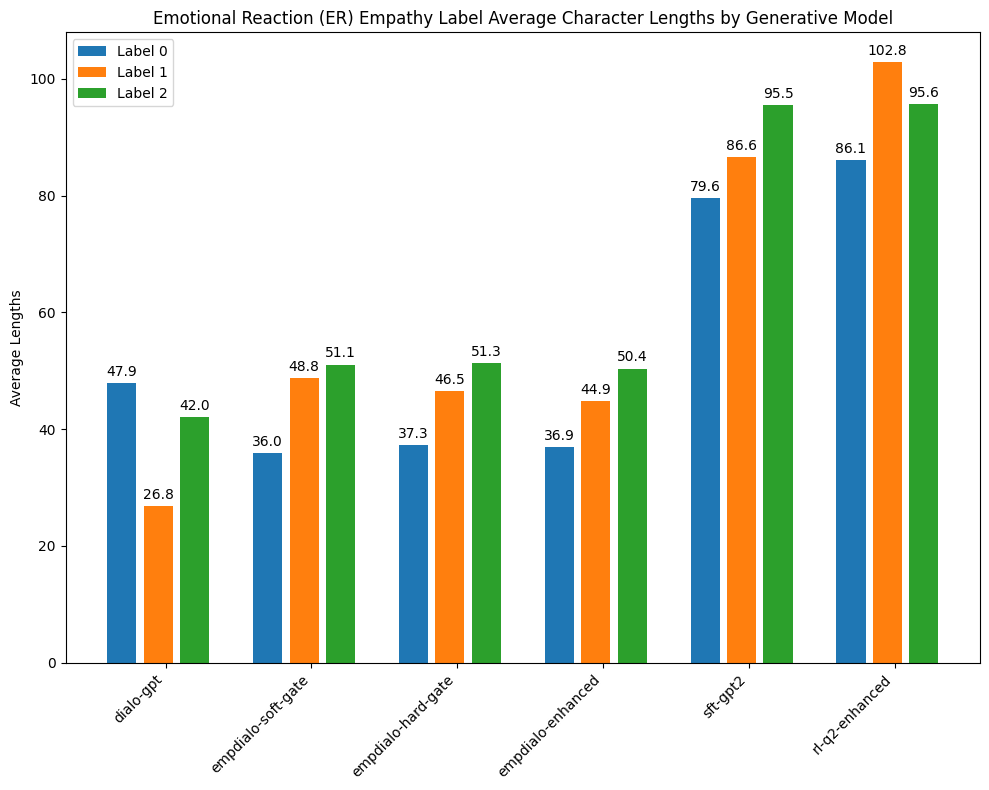

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
models = ['dialo-gpt', 'empdialo-soft-gate', 'empdialo-hard-gate', 'empdialo-enhanced', 'sft-gpt2', 'rl-q2-enhanced']
categories = ['0', '1', '2']
values = {
    'dialo-gpt': [47.85, 26.80, 42.02],
    'empdialo-soft-gate': [35.97, 48.77, 51.07],
    'empdialo-hard-gate': [37.27, 46.47, 51.29],
    'empdialo-enhanced': [36.87, 44.85, 50.38],
    'sft-gpt2': [79.63, 86.60, 95.52],
    'rl-q2-enhanced': [86.10, 102.82, 95.62]
}

# Plotting the bar chart
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.05  # space between bars

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
bars = []

for i, cat in enumerate(categories):
    bar = ax.bar(x - (1.5 * width) + i * (width + spacing), [values[model][i] for model in models], width, label=f'Label {cat}')
    bars.append(bar)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Lengths')
ax.set_title('Emotional Reaction (ER) Empathy Label Average Character Lengths by Generative Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for better visibility
ax.legend()

# Label each bar with values
for bars_group in bars:
    for bar in bars_group:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


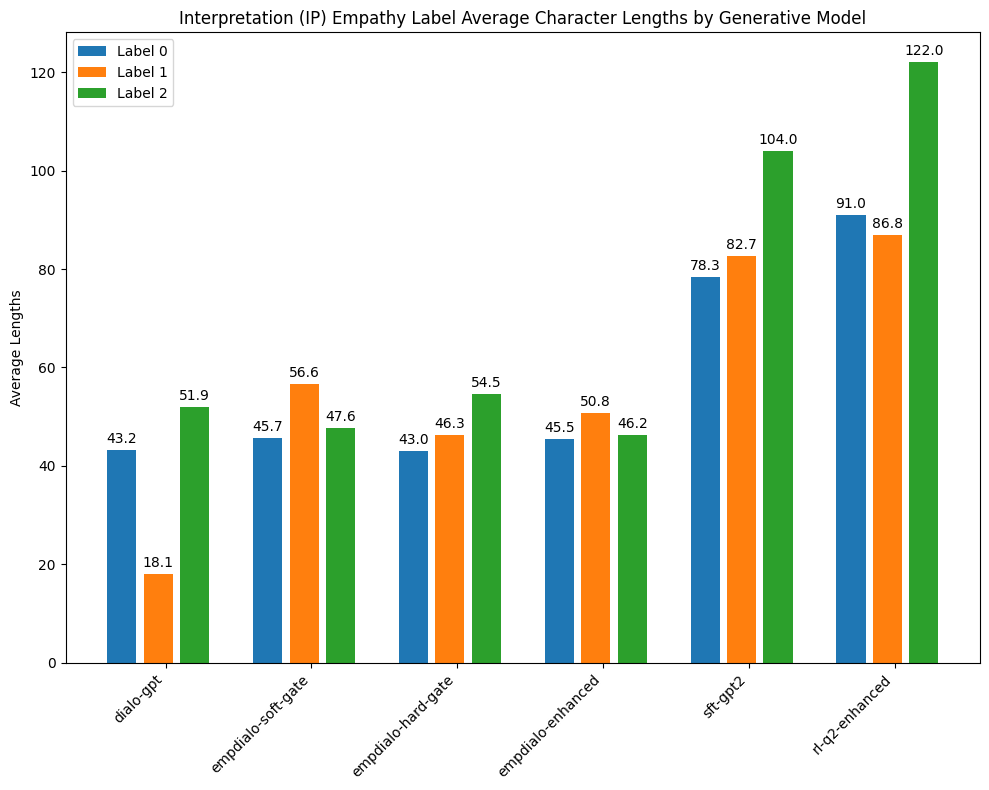

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
models = ['dialo-gpt', 'empdialo-soft-gate', 'empdialo-hard-gate', 'empdialo-enhanced', 'sft-gpt2', 'rl-q2-enhanced']
categories = ['0', '1', '2']
values = {
    'dialo-gpt': [43.21, 18.05, 51.89],
    'empdialo-soft-gate': [45.69, 56.64, 47.60],
    'empdialo-hard-gate': [43.00, 46.27, 54.53],
    'empdialo-enhanced': [45.49, 50.79, 46.19],
    'sft-gpt2': [78.31, 82.65, 103.97],
    'rl-q2-enhanced': [91.04, 86.85, 122.00]
}

# Plotting the bar chart
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.05  # space between bars

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
bars = []

for i, cat in enumerate(categories):
    bar = ax.bar(x - (1.5 * width) + i * (width + spacing), [values[model][i] for model in models], width, label=f'Label {cat}')
    bars.append(bar)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Lengths')
ax.set_title('Interpretation (IP) Empathy Label Average Character Lengths by Generative Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for better visibility
ax.legend()

# Label each bar with values
for bars_group in bars:
    for bar in bars_group:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


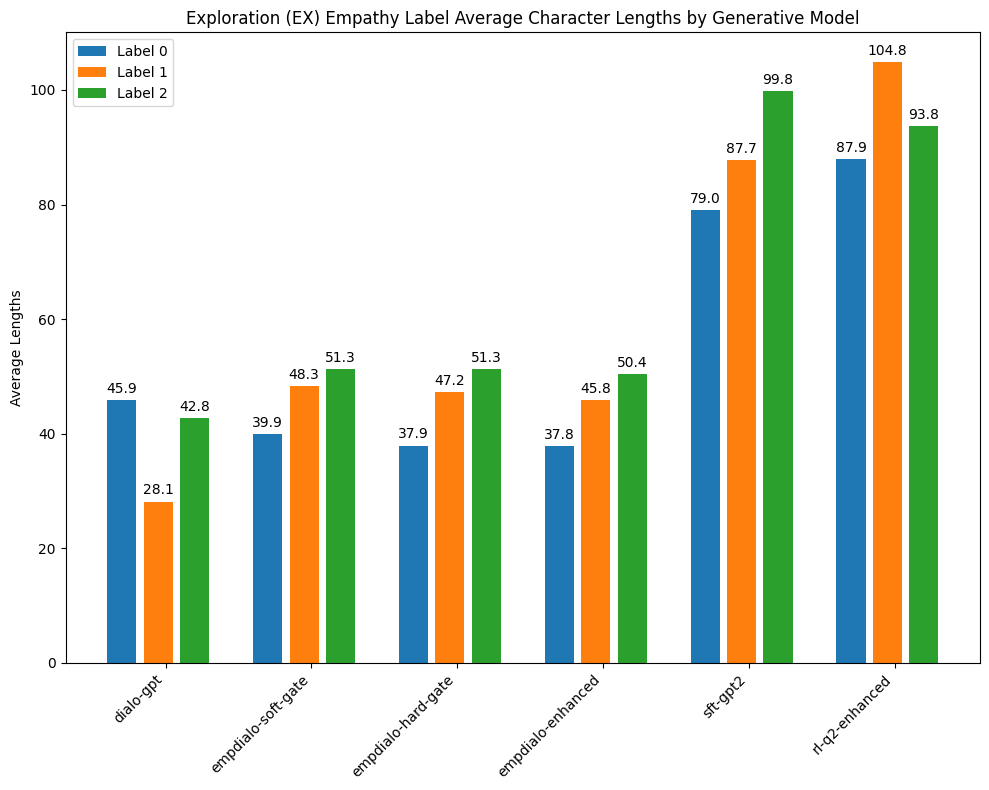

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
models = ['dialo-gpt', 'empdialo-soft-gate', 'empdialo-hard-gate', 'empdialo-enhanced', 'sft-gpt2', 'rl-q2-enhanced']
categories = ['0', '1', '2']
values = {
    'dialo-gpt': [45.89, 28.13, 42.78],
    'empdialo-soft-gate': [39.85, 48.33, 51.28],
    'empdialo-hard-gate': [37.90, 47.23, 51.29],
    'empdialo-enhanced': [37.77, 45.83, 50.38],
    'sft-gpt2': [79.02, 87.74, 99.77],
    'rl-q2-enhanced': [87.87, 104.82, 93.76]
}

# Plotting the bar chart
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.05  # space between bars

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
bars = []

for i, cat in enumerate(categories):
    bar = ax.bar(x - (1.5 * width) + i * (width + spacing), [values[model][i] for model in models], width, label=f'Label {cat}')
    bars.append(bar)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Lengths')
ax.set_title('Exploration (EX) Empathy Label Average Character Lengths by Generative Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for better visibility
ax.legend()

# Label each bar with values
for bars_group in bars:
    for bar in bars_group:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
